In [2]:
import pandas as pd

df = pd.read_csv('Data/news.csv')
df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0


In [3]:
#클래스별 샘플 갯수

df["category"].value_counts()

category
2    4682
1    2872
3    2121
Name: count, dtype: int64

In [5]:
import re
# ^[  ] start, [^ ] not , 한글/영문자만 허용
def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
            # ^[]     start
            # [^...]  not    ...에 해당되지 않는 나머지: 즉, 특수문자, 문장부호 > ' ' 공백으로 대체
    return sentence

# content 필드에 preprocessing 함수 적용
df['content_cleaned'] = df['content'].apply(preprocessing)
content = df['content_cleaned'].tolist()
content[0]

'     학년도에 수시 정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부종합전형 학종      로 만들겠다는 꼼수다  학종에 대한 불신이 큰 현실을 외면한 채 혼란을 키우고 있는 김경범 서울대 교수를 국가교육회의에서 내보내야 한다  공정사회를위한국민모임 공정사회 은   일 오전   시 정부서울청사에서 기자회견 열고 국가교육회의 위원인 김경범 서울대 서어서문학과 교수의 사퇴를 촉구했다  김 교수가 학종을 옹호하고 있어 공정한 대입제도 개편에 걸림돌이 된다는 주장이다 이처럼     학년도 대입제도를 둘러싼 논란이 확산하고 있다  전날 청주 오송에서 열린 고교학점제 연구학교 교원연수 행사에서 김 교수가 미래 대입 전형을 주제로 발표한 게 불씨가 됐다  김 교수는 국가교육회의  기에서 고등교육전문위원회 위원으로 참여하고 있다 김 교수는 자료집에서  수시와 정시를   월로 통합해 수능 성적과 학생부 면접을 한꺼번에 평가하자 고 제안했다  또 수능 전 과목을 절대평가하고  EBS 연계도 폐지해야 한다고 주장했다      학년도 고교학점제에 따라     학년도 대입을 개편해야 한다면서 이같이 밝힌 것이다 현행 대입은 수시와 정시로 시기가 구분돼 있어 수시는  월  정시는   월 말에 원서를 접수한다  수시 준비하느라 고   학기 때 학교 수업이 제대로 이뤄지지 않는다는 비판은 꾸준히 제기돼 왔다  김 교수의 주장에 따르면 선발 시기를 통합하면 고  교실도 정상화하고 학생 학부모 교사의 부담도 줄일 수 있다는 것이다 이에 대해 대학 관계자와 교사 학부모는 엇갈린 의견을 내놨다  고교 교사는 환영했지만  대학 입학관계자와 학부모는 부정적이었다  서울 일반고의 한 교사는  대입 전형 시기가 나뉘어 있어 교사와 학생 학부모의 부담이 크고  고   학기 수업이 파행된 것은 맞다 며  이번에 나온 방안은 아니더라도 어떤 식으로든 변화가 필요하다 고 말했다 반면 서울 사립대의 한 입학처장은  고교별 수준이 제각각인 상황에서 수능까지 절대평가로 바뀌면 변별력이 크게 약화할 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 인코딩한 벡터를 생성

# vectorizer = CountVectorizer() # 정수인코딩 + 출현빈도
vectorizer = CountVectorizer(max_features=1000) # max_features: 출현빈도 상위단어 최대 1000개 추출
vectorizer_tf = TfidfVectorizer(max_features=1000) #단어수 제한
X = vectorizer.fit_transform(content)
X_tf = vectorizer_tf.fit_transform(content)
X.shape, X_tf.shape

((9675, 1000), (9675, 1000))

In [10]:
X[0]   # sparse matrix 희소행렬

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 76 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.preprocessing import normalize

# L2 정규화 (TfidfVectorizer의 경우 생략) 유클리디안 방식, 대부분 L2사용  vs L1 정규화: 오차의 절대값만큼 패널티를 줌
X = normalize(X)
X[0].toarray()     # dense matrix 밀집행렬:: 메모리낭비가 심함

array([[0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.07930516, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07930516, 0.        ,
        0.        , 0.23791548, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [16]:
from sklearn.cluster import KMeans

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=3,random_state=10).fit(X)
kmeans_tf = KMeans(n_clusters=3,random_state=10).fit(X_tf)

# labels에 merge
#df['labels'] = kmeans.labels_
print(kmeans.labels_)
print(pd.DataFrame(kmeans.labels_).value_counts())

print(kmeans_tf.labels_)
print(pd.DataFrame(kmeans_tf.labels_).value_counts())

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 ... 0 0 1]
0    4725
1    3833
2    1117
Name: count, dtype: int64
[1 0 0 ... 0 0 0]
0    5762
1    2792
2    1121
Name: count, dtype: int64


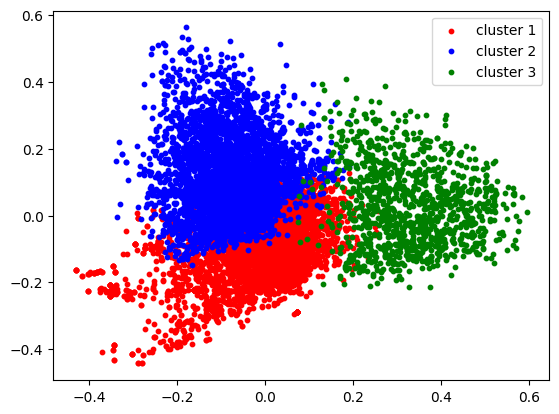

In [17]:
#그래프 출력을 위해 주성분 분석

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2, random_state=10)
components = pca.fit_transform(X.toarray())
df3 = pd.DataFrame(data=components, columns=['component 1','component 2'])
df3.index = df['category']

plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], df3.iloc[kmeans.labels_ == 0, 1], s=10, c='r', label='cluster 1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], df3.iloc[kmeans.labels_ == 1, 1], s=10, c='b', label='cluster 2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], df3.iloc[kmeans.labels_ == 2, 1], s=10, c='g', label='cluster 3')
plt.legend()
plt.show()

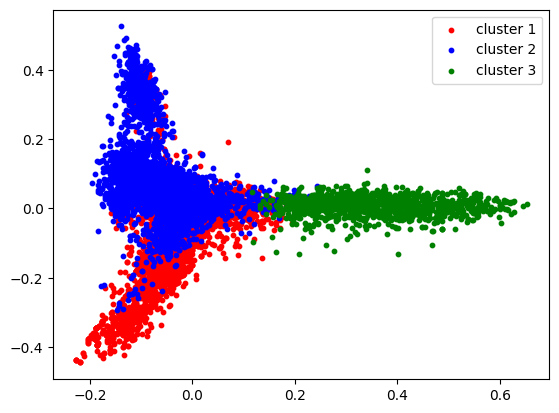

In [18]:
#그래프 출력을 위해 주성분 분석

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2, random_state=10)
components = pca.fit_transform(X_tf.toarray())
df3 = pd.DataFrame(data=components, columns=['component 1','component 2'])
df3.index = df['category']

plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], df3.iloc[kmeans.labels_ == 0, 1], s=10, c='r', label='cluster 1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], df3.iloc[kmeans.labels_ == 1, 1], s=10, c='b', label='cluster 2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], df3.iloc[kmeans.labels_ == 2, 1], s=10, c='g', label='cluster 3')
plt.legend()
plt.show()

### 일반적으로는 CountVectorizer보다 TfidfVectorizer를 사용